In [1]:
import pandas as pd
import numpy as np 
import warnings
import matplotlib
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
# plt.rc('font',family = 'NanumGothic')
plt.rc('font',family = 'Malgun Gothic')
matplotlib.rc("axes",unicode_minus = False) # 음수표시 


#스케일
from sklearn.preprocessing import StandardScaler

#분류 SVM
from sklearn.svm import SVC

#로지스틱
from statsmodels.api import Logit

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import GradientBoostingClassifier

In [2]:
df1 = pd.read_csv("회원전처리.csv")
df1

,회원번호,회원상태,성별,나이,등록카드,결혼,구독여부,주소지,세부주소지
0,18764160,정상회원,여,68,농협중앙회,기혼,False,서울특별시,성동구
1,18792000,정상회원,남,83,연결앱결제,미기입,False,강원도,강릉시
2,18942336,정상회원,여,39,신한은행,기혼,False,인천광역시,중구
3,18949760,정상회원,여,73,기업은행,미기입,NaN,강원도,홍천군
4,19391488,정상회원,여,52,연결앱결제,기혼,False,대전광역시,중구
...,...,...,...,...,...,...,...,...,...
12531,1644772352,정상회원,여,50,국민카드,기혼,False,강원도,삼척시
12532,1644957952,정상회원,여,34,신한은행,미혼,False,부산광역시,중구
12533,1645334720,정상회원,남,24,국민카드,미혼,False,전라남도,여수시
12534,1670400000,탈퇴,남,28,연결앱결제,미기입,False,대구광역시,북구


# 구독여부 결측치 날리기

In [3]:
# df1 = pd.read_csv("회원전처리.csv")
# df1
df2 = df1[df1["구독여부"].notnull()]
df2

,회원번호,회원상태,성별,나이,등록카드,결혼,구독여부,주소지,세부주소지
0,18764160,정상회원,여,68,농협중앙회,기혼,False,서울특별시,성동구
1,18792000,정상회원,남,83,연결앱결제,미기입,False,강원도,강릉시
2,18942336,정상회원,여,39,신한은행,기혼,False,인천광역시,중구
4,19391488,정상회원,여,52,연결앱결제,기혼,False,대전광역시,중구
5,19627200,정상회원,여,45,기업은행,미기입,False,전라북도,군산시
...,...,...,...,...,...,...,...,...,...
12530,1644735232,정상회원,여,22,농협중앙회,미혼,False,서울특별시,관악구
12531,1644772352,정상회원,여,50,국민카드,기혼,False,강원도,삼척시
12532,1644957952,정상회원,여,34,신한은행,미혼,False,부산광역시,중구
12533,1645334720,정상회원,남,24,국민카드,미혼,False,전라남도,여수시


In [4]:
df2["회원상태"].value_counts() 

정상회원     10055
탈퇴         134
탈퇴신청         1
탈퇴처리중        1
Name: 회원상태, dtype: int64

In [5]:
df2["구독여부"].value_counts()

False    8438
True     1753
Name: 구독여부, dtype: int64

In [6]:
df2["나이"].sort_values()

10422    18
12290    18
11713    18
12080    18
12147    18
         ..
4744     83
1        83
868      84
10193    84
4492     87
Name: 나이, Length: 10191, dtype: int64

In [7]:
df_age = df2.copy()

In [76]:
df_age_20age = df_age[(df_age['나이']>= 30) & (df_age['나이']< 50)] #20대,30대
df_age_30age = df_age[(df_age['나이']>= 30) & (df_age['나이']< 40)] #30대
df_age_40age = df_age[(df_age['나이']>= 50) & (df_age['나이']< 70)] #40대,50대
# df_age_50age = df_age[(df_age['나이']>= 50) & (df_age['나이']< 60)] #50대
# df_age_60age = df_age[df_age['나이']>= 60]

In [77]:
df_age_20 = df_age_20age.groupby('구독여부')['나이'].count().reset_index()    #20대 카드 개수 
df_age_20.columns = ['구독여부', '구독횟수']
df_age_20 = df_age_20.sort_values(by='구독횟수', ascending=False)
df_age_20

,구독여부,구독횟수
0,False,5461
1,True,1092


In [78]:
df_age_30 = df_age_30age.groupby('구독여부')['나이'].count().reset_index()    #20대 카드 개수 
df_age_30.columns = ['구독여부', '구독횟수']
df_age_30 = df_age_30.sort_values(by='구독횟수', ascending=False)
df_age_30

,구독여부,구독횟수
0,False,3215
1,True,629


In [79]:
df_age_40 = df_age_40age.groupby('구독여부')['나이'].count().reset_index()    #20대 카드 개수 
df_age_40.columns = ['구독여부', '구독횟수']
df_age_40 = df_age_40.sort_values(by='구독횟수', ascending=False)
df_age_40

,구독여부,구독횟수
0,False,1801
1,True,410


In [80]:
df_age_50 = df_age_50age.groupby('구독여부')['나이'].count().reset_index()    #20대 카드 개수 
df_age_50.columns = ['구독여부', '구독횟수']
df_age_50 = df_age_50.sort_values(by='구독횟수', ascending=False)
df_age_50

,구독여부,구독횟수
0,False,1207
1,True,272


In [81]:
df_age_60 = df_age_60age.groupby('구독여부')['나이'].count().reset_index()    #20대 카드 개수 
df_age_60.columns = ['구독여부', '구독횟수']
df_age_60 = df_age_60.sort_values(by='구독횟수', ascending=False)
df_age_60

,구독여부,구독횟수
0,False,763
1,True,177


In [82]:
df_age["나이"]

0        68
1        83
2        39
4        52
5        45
         ..
12530    22
12531    50
12532    34
12533    24
12534    28
Name: 나이, Length: 10191, dtype: int64

In [103]:
df_age_card = df_age.groupby(pd.cut(df_age['나이'], [0,25, 35,45,55, 100]))['구독여부'].value_counts().unstack()
df_age_card.index = ['25세이하','26~35세','36~45세','46~55대','56세 이상']
df_age_card.columns.name = '구독여부'
df_age_card.fillna(0, inplace=True)
df_age_card

구독여부,False,True
25세이하,229,53
26~35세,2723,500
36~45세,2922,620
46~55대,1365,303
56세 이상,1199,277


In [104]:
df_age_card[False]

25세이하      229
26~35세    2723
36~45세    2922
46~55대    1365
56세 이상    1199
Name: False, dtype: int64

귀무가설: 나이와 구독여부는 서로 독립적이다. \
대립가설: 나이와 구독여부는 서로 독립적이지 않다.

In [105]:
from scipy.stats import chi2_contingency
df_age_card = [[df_age_card[False], df_age_card[True]]]

# 카이제곱 검정 수행
chi2, pval, dof, exp_freq = chi2_contingency(df_age_card)

print('카이제곱 검정통계량:', chi2)
print('p-value:', pval)

카이제곱 검정통계량: 10.806062008182153
p-value: 0.02883228446107417


=> p값<0.05 보다 작으므로 귀무가설을 기각하여 연령대와 구독여부는 서로 독립적이지 않다.\
따라서, 연령대와 구독여부 간은 관계가 있다.

# 연령대별로 구독한 횟수와 안한횟수를 구해서 비율구해보기

In [8]:
df12 = df2.copy()

In [9]:
df_10age = df12[(df12['나이']< 26)]
df_20age = df12[(df12['나이']>= 26) & (df12['나이']< 36)]
df_30age = df12[(df12['나이']>= 36) & (df12['나이']< 46)]
df_40age = df12[(df12['나이']>= 46) & (df12['나이']< 56)]
df_50age = df12[(df12['나이']>= 56) & (df12['나이']< 100)]
# df_60age = df12[df12['나이']>= 60]

In [10]:
a1 = df_20age[df_20age["구독여부"] == True]["회원번호"].count()
b1 = df_20age[df_20age["구독여부"] == False]["회원번호"].count()
a2 = df_30age[df_30age["구독여부"] == True]["회원번호"].count()
b2 = df_30age[df_30age["구독여부"] == False]["회원번호"].count()
a3 = df_40age[df_40age["구독여부"] == True]["회원번호"].count()
b3 = df_40age[df_40age["구독여부"] == False]["회원번호"].count()
a4 = df_50age[df_50age["구독여부"] == True]["회원번호"].count()
b4 = df_50age[df_50age["구독여부"] == False]["회원번호"].count()
a5 = df_10age[df_10age["구독여부"] == True]["회원번호"].count()
b5 = df_10age[df_10age["구독여부"] == False]["회원번호"].count()

In [11]:
c = round(a5/b5,3)
print(f'25세이하의 평균: {c}')
c = round(a1/b1,3)
print(f'26~35세의 구독비율: {c}')
c = round(a2/b2,3)
print(f'36~45세의 구독비율: {c}')
c = round(a3/b3,3)
print(f'46~55세의 구독비율: {c}')
c = round(a4/b4,3)
print(f'56세이상 구독비율: {c}')
# c = round(a5/b5,3)
# print(f'60대이상의 평균: {c}')

25세이하의 평균: 0.231
26~35세의 구독비율: 0.184
36~45세의 구독비율: 0.212
46~55세의 구독비율: 0.222
56세이상 구독비율: 0.231


# 범주화한 연령대별로 매출비중이 얼마인지 그리기

In [12]:
df12

,회원번호,회원상태,성별,나이,등록카드,결혼,구독여부,주소지,세부주소지
0,18764160,정상회원,여,68,농협중앙회,기혼,False,서울특별시,성동구
1,18792000,정상회원,남,83,연결앱결제,미기입,False,강원도,강릉시
2,18942336,정상회원,여,39,신한은행,기혼,False,인천광역시,중구
4,19391488,정상회원,여,52,연결앱결제,기혼,False,대전광역시,중구
5,19627200,정상회원,여,45,기업은행,미기입,False,전라북도,군산시
...,...,...,...,...,...,...,...,...,...
12530,1644735232,정상회원,여,22,농협중앙회,미혼,False,서울특별시,관악구
12531,1644772352,정상회원,여,50,국민카드,기혼,False,강원도,삼척시
12532,1644957952,정상회원,여,34,신한은행,미혼,False,부산광역시,중구
12533,1645334720,정상회원,남,24,국민카드,미혼,False,전라남도,여수시


In [ ]:
df_20age = df12[(df12['나이']>= 26) & (df12['나이']< 36)]
df_30age = df12[(df12['나이']>= 36) & (df12['나이']< 46)]
df_40age = df12[(df12['나이']>= 46) & (df12['나이']< 56)]
df_50age = df12[(df12['나이']>= 56) & (df12['나이']< 100)]

# 결혼별로 구독한 횟수와 안한횟수를 구해서 비율구해보기

In [38]:
df1 = pd.read_csv("회원전처리.csv")
df2 = df1[df1["구독여부"].notnull()]
df2

,회원번호,회원상태,성별,나이,등록카드,결혼,구독여부,주소지,세부주소지
0,18764160,정상회원,여,68,농협중앙회,기혼,False,서울특별시,성동구
1,18792000,정상회원,남,83,연결앱결제,미기입,False,강원도,강릉시
2,18942336,정상회원,여,39,신한은행,기혼,False,인천광역시,중구
4,19391488,정상회원,여,52,연결앱결제,기혼,False,대전광역시,중구
5,19627200,정상회원,여,45,기업은행,미기입,False,전라북도,군산시
...,...,...,...,...,...,...,...,...,...
12530,1644735232,정상회원,여,22,농협중앙회,미혼,False,서울특별시,관악구
12531,1644772352,정상회원,여,50,국민카드,기혼,False,강원도,삼척시
12532,1644957952,정상회원,여,34,신한은행,미혼,False,부산광역시,중구
12533,1645334720,정상회원,남,24,국민카드,미혼,False,전라남도,여수시


In [39]:
df2["결혼"].value_counts()

기혼     4188
미혼     3807
미기입    2196
Name: 결혼, dtype: int64

# 결혼 한 사람중에 구독비율 ,안한사람중에 구독 비율 구해서 비교하기

In [40]:
df4 = df2.copy()

In [41]:
df5 = df4[df4["결혼"]=="기혼"]
df6 = df4[df4["결혼"]=="미혼"]

In [42]:
a1 = df5[df5["구독여부"] == True]["회원번호"].count()
b1 = df5[df5["구독여부"] == False]["회원번호"].count()
a2 = df6[df6["구독여부"] == True]["회원번호"].count()
b2 = df6[df6["구독여부"] == False]["회원번호"].count()
c1 = round(a1/b1,3)
print(f'기혼의 구독비율: {c1}')
c2 = round(a2/b2,3)
print(f'미혼의 구독비율: {c2}')

기혼의 구독비율: 0.209
미혼의 구독비율: 0.21


# 귀무가설: 두 집단내의 비율이 같다. == 차이가 없다.

# 대립가설: 두 집단내의 비율이 다르다. == 차이가 있다.

In [45]:
#통계 분석 
import statsmodels.api as sm
import scipy
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

In [46]:
#변수선언
count = np.array([a1,a2])
nobs = np.array([a1+b1,a2+b2])
#proportion test 실행
stat,pval = proportions_ztest(count,nobs)
print("2 proprotion test")
print("z:{0:0.3f}".format(stat))
print("p:{0:0.3f}".format(pval))

2 proprotion test
z:-0.120
p:0.905


- p-value=0.905로 <0.05보다 크므로 귀무가설을 채택하여 두 개의 집단은 차이가 없다. 즉, 결혼과 구독은 관련이 없다.

# 성별(여성기준으로) 구독비율 ,안한사람중에 구독 비율 구해서 비교하기

In [47]:
df4 = df2.copy()

In [48]:
df5 = df4[df4["성별"]=="남"]
df6 = df4[df4["성별"]=="여"]

In [50]:
a1 = df5[df5["구독여부"] == True]["회원번호"].count()
b1 = df5[df5["구독여부"] == False]["회원번호"].count()
a2 = df6[df6["구독여부"] == True]["회원번호"].count()
b2 = df6[df6["구독여부"] == False]["회원번호"].count()
c1 = round(a1/b1,3)
print(f'남자의 구독비율: {c1}')
c2 = round(a2/b2,3)
print(f'여자의 구독비율: {c2}')

남자의 구독비율: 0.261
여자의 구독비율: 0.205


# 귀무가설: 두 집단내의 비율이 같다. == 차이가 없다.

# 대립가설: 두 집단내의 비율이 다르다. == 차이가 있다.

In [53]:
#변수선언
count = np.array([a1,a2])
nobs = np.array([a1+b1,a2+b2])
#proportion test 실행
stat,pval = proportions_ztest(count,nobs)
print("2 proprotion test")
print("z:{0:0.3f}".format(stat))
print("p:{0:0.3f}".format(pval))

2 proprotion test
z:2.286
p:0.022


- p-value=0.022로 <0.05보다 작으므로 귀무가설을 기각하고 대립가설을 채택하여 두 개의 집단은 차이가 있다. 즉, 성별과 구독의 비율에는 차이가 있다.
- z값이 0보다 크기때문에 왼쪽의 비율이 더크다. 즉 왼쪽은 a1으로 남자이므로 남자의 구독비율이 더 큰 것을 알 수 있다.

# 구독과 등록카드의 관계

In [60]:
df100 = df2.copy()
df100

,회원번호,회원상태,성별,나이,등록카드,결혼,구독여부,주소지,세부주소지
0,18764160,정상회원,여,68,농협중앙회,기혼,False,서울특별시,성동구
1,18792000,정상회원,남,83,연결앱결제,미기입,False,강원도,강릉시
2,18942336,정상회원,여,39,신한은행,기혼,False,인천광역시,중구
4,19391488,정상회원,여,52,연결앱결제,기혼,False,대전광역시,중구
5,19627200,정상회원,여,45,기업은행,미기입,False,전라북도,군산시
...,...,...,...,...,...,...,...,...,...
12530,1644735232,정상회원,여,22,농협중앙회,미혼,False,서울특별시,관악구
12531,1644772352,정상회원,여,50,국민카드,기혼,False,강원도,삼척시
12532,1644957952,정상회원,여,34,신한은행,미혼,False,부산광역시,중구
12533,1645334720,정상회원,남,24,국민카드,미혼,False,전라남도,여수시


In [63]:
df_age_20 = df100.groupby('등록카드')['구독여부'].count().reset_index()    #20대 카드 개수 
df_age_20.columns = ['등록카드', '카드 개수']
df_age_20 = df_age_20.sort_values(by='카드 개수', ascending=False)
df_age_20

,등록카드,카드 개수
9,롯데카드,1445
4,국민은행,1391
19,연결앱결제,1134
15,신한은행,1098
7,농협중앙회,919
21,우리은행,883
5,국민카드,454
16,신한카드,409
6,기업은행,352
23,하나은행,339


In [71]:
df_age_20["카드 개수"].sum()

10191

In [77]:
df_age_20["등록카드"].unique()

array(['롯데카드', '국민은행', '연결앱결제', '신한은행', '농협중앙회', '우리은행', '국민카드', '신한카드',
       '기업은행', '하나은행', 'BC카드', '현대카드', '삼성카드', '부산은행', '새마을금고', 'SC제일은행',
       '광주은행', '씨티은행', '우체국', '외환은행', '대구은행', '신협중앙회', '미래에셋증권', '경남은행',
       '미기입'], dtype=object)

In [81]:
df_age_card = df100.groupby("카드 개수")['등록카드'].value_counts().unstack()
df_age_card.index = ['롯데카드', '국민은행', '연결앱결제', '신한은행', '농협중앙회', '우리은행', '국민카드', '신한카드',
       '기업은행', '하나은행', 'BC카드', '현대카드', '삼성카드', '부산은행', '새마을금고', 'SC제일은행',
       '광주은행', '씨티은행', '우체국', '외환은행', '대구은행', '신협중앙회', '미래에셋증권', '경남은행',
       '미기입']
df_age_card.columns.name = '등록카드'
df_age_card.fillna(0, inplace=True)
df_age_card

KeyError: '카드 개수'

In [68]:
df_age_card = df_age_20.copy()

In [70]:
df_age_card

,등록카드,카드 개수
9,롯데카드,1445
4,국민은행,1391
19,연결앱결제,1134
15,신한은행,1098
7,농협중앙회,919
21,우리은행,883
5,국민카드,454
16,신한카드,409
6,기업은행,352
23,하나은행,339


In [69]:
from scipy.stats import chi2_contingency
df_age_card = [[df_age_card['BC카드'], df_age_card['SC제일은행'],df_age_card['경남은행'],df_age_card['광주은행'],df_age_card['국민은행'], df_age_card['국민카드'], df_age_card['기업은행'],df_age_card['농협중앙회'], df_age_card['대구은행'],df_age_card['롯데카드'],df_age_card['미기입'], df_age_card['미래에셋증권'], df_age_card['부산은행'],df_age_card['삼성카드'],df_age_card['새마을금고'], df_age_card['신한은행'],df_age_card['신한카드'], df_age_card['신협중앙회'], df_age_card['씨티은행'],df_age_card['연결앱결제'],df_age_card['외환은행'],df_age_card['우리은행'],df_age_card['우체국'],df_age_card['하나은행'], df_age_card['현대카드']]]

# 카이제곱 검정 수행
chi2, pval, dof, exp_freq = chi2_contingency(df_age_card)

print('카이제곱 검정통계량:', chi2)
print('p-value:', pval)


KeyError: 'BC카드'

# 연령대별 구독여부

- 1. 시각화를 어떻게하지?
- 2. 구독true : 1, false:0로 하고 나이를 연령대별로 통합시키고 히스토그램으 만들어보자.

# 히스토그램 - 양품/불량 기준(연속형 데이터)

In [54]:
def fun_plot_hist(data, var):
    plt.hist(data[data["구독여부"] == False][var], label = "구독안함", alpha = 0.5)
    plt.hist(data[data["구독여부"] == True][var], label = "구독함", alpha = 0.5)
    plt.title(var)
    plt.legend()

In [56]:
df2["나이"].unique()

array([68, 83, 39, 52, 45, 50, 43, 58, 41, 48, 44, 62, 65, 47, 38, 49, 40,
       66, 57, 54, 67, 42, 63, 51, 64, 55, 56, 70, 61, 59, 53, 33, 69, 72,
       36, 46, 60, 81, 73, 71, 37, 76, 79, 31, 34, 74, 77, 35, 30, 32, 84,
       28, 75, 80, 78, 23, 29, 26, 24, 27, 21, 25, 87, 22, 19, 82, 20, 18],
      dtype=int64)

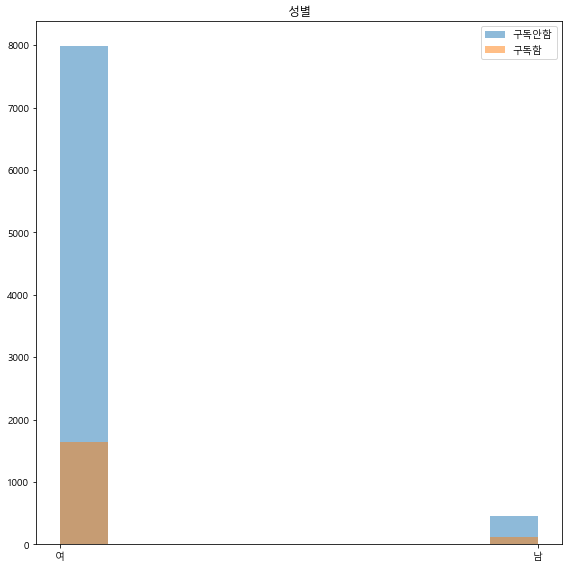

In [57]:
plt.figure(figsize=(8,8))
fun_plot_hist(df2, "성별")

plt.tight_layout()